In [14]:
# El notebook debe estás en <root>/notebooks/
import os, sys

# sube un nivel para que Python encuentre la carpeta src/

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Raiz del prooyecto añadida a sys.path:", project_root)


Raiz del prooyecto añadida a sys.path: c:\fuzzy_calidad_agua


In [15]:
# 2) Importar librerías y funciones
import pandas as pd
import matplotlib.pyplot as plt
from src.pertenencia.membership_functions import generate_universes, create_mfs

In [16]:
# 3) Cargar el dataset
# Descarga el CSV desde Mendeley y pon la ruta correcta aquí:
df = pd.read_csv('../data/processed/winsorized_water_quality.csv', sep=';')
df.head(5)

,Temp,Turbidity (cm),DO(mg/L),BOD (mg/L),CO2,PH,Alkalinity (mg L-1 ),Hardness (mg L-1 ),Calcium (mg L-1 ),Ammonia (mg L-1 ),Nitrite (mg L-1 ),Phosphorus (mg L-1 ),H2S (mg L-1 ),Water Quality
0,46.030363,10.1271,0.208200,7.473600,10.18110,4.7517,218.3649,300.125100,253.37435,0.07845,2.900975,0.0060,0.03385,2
1,46.030363,94.0156,10.335437,8.528388,13.03055,3.0852,271.4524,8.426800,253.37435,0.07845,2.182800,0.0049,0.02340,2
2,46.030363,90.6535,10.335437,8.528388,12.32000,9.6485,220.8127,11.726300,253.37435,0.07845,2.900975,0.0070,0.03385,2
3,4.023263,0.0663,10.335437,8.508000,12.95520,4.8200,266.5716,6.627700,8.18050,0.07845,2.900975,3.1745,0.02600,2
4,46.030363,2.1192,1.361700,8.528388,13.03055,10.2440,252.1080,302.469587,253.37435,0.07845,2.900975,3.8547,0.03385,2


In [17]:
# 4) Definir las columnas de entrada
feature_cols = [
    'Temp', 'Turbidity (cm)', 'DO(mg/L)', 'BOD (mg/L)', 'CO2', 'PH',
    'Alkalinity (mg L-1 )', 'Hardness (mg L-1 )', 'Calcium (mg L-1 )',
    'Ammonia (mg L-1 )', 'Nitrite (mg L-1 )', 'Phosphorus (mg L-1 )',
    'H2S (mg L-1 )'
]

In [18]:
# 5) Generar universos de discurso y MFs
universes = generate_universes(df, feature_cols, n_points=200)
mfs = create_mfs(universes)


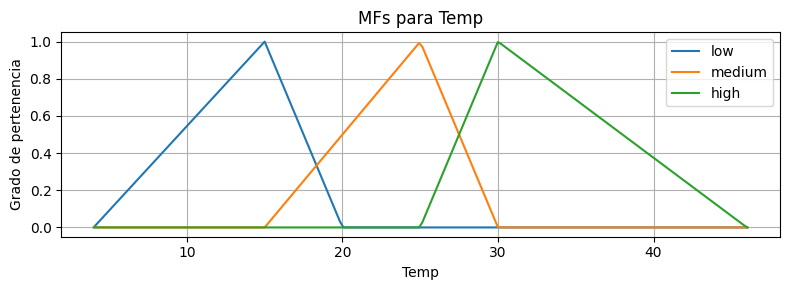

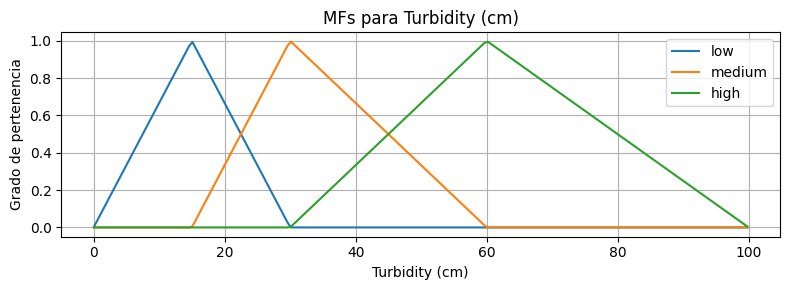

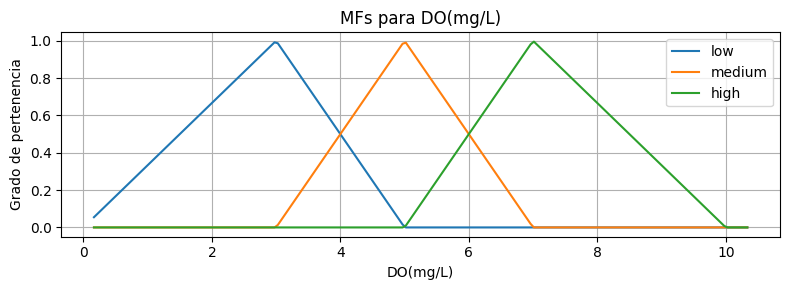

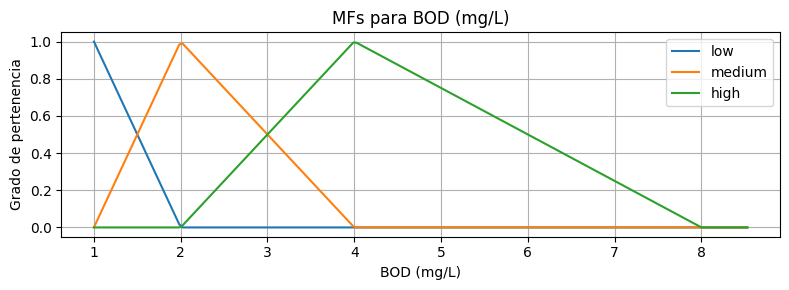

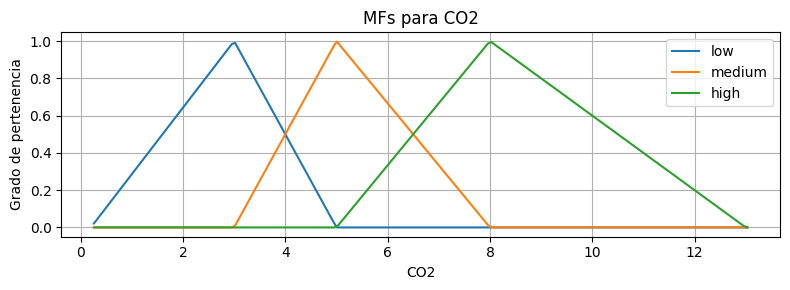

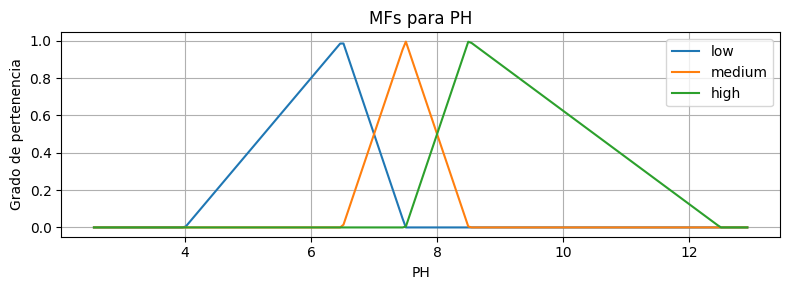

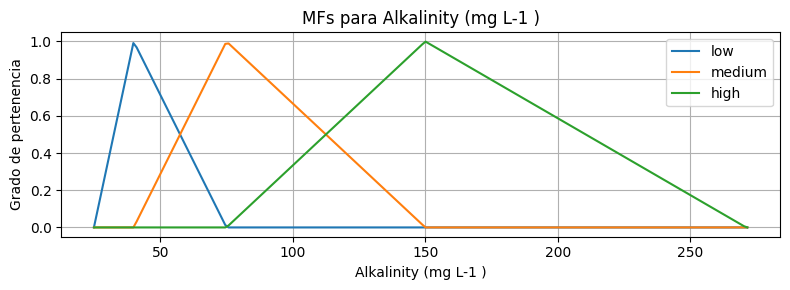

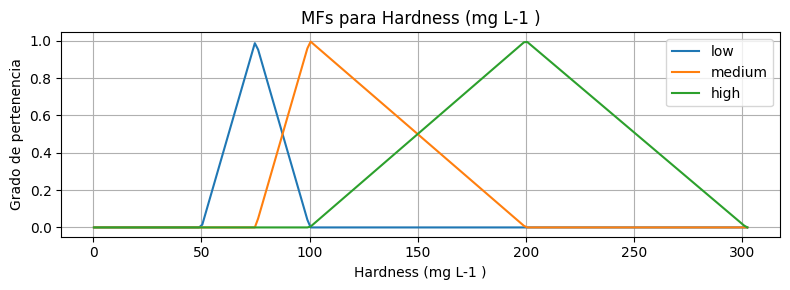

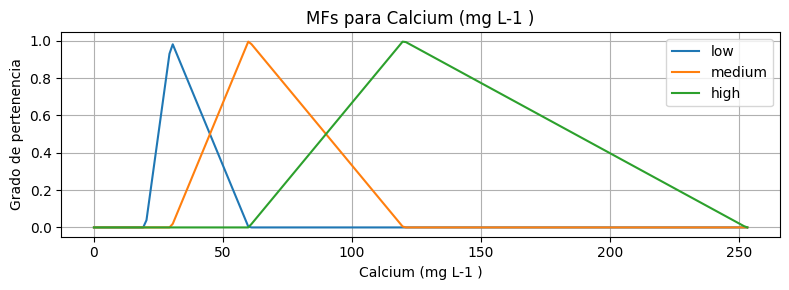

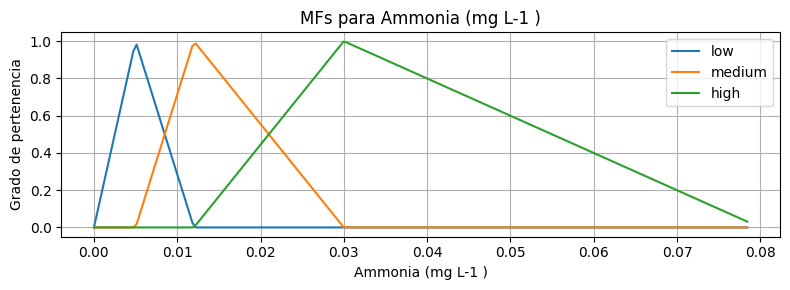

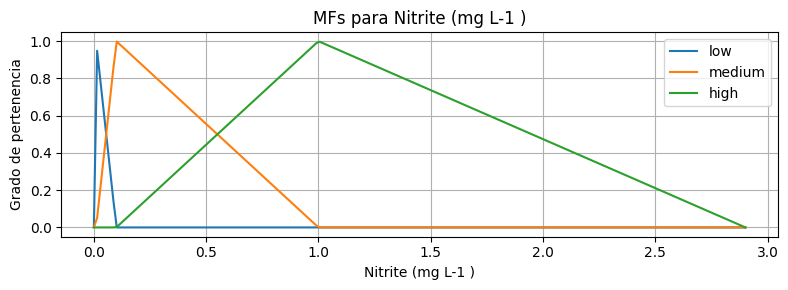

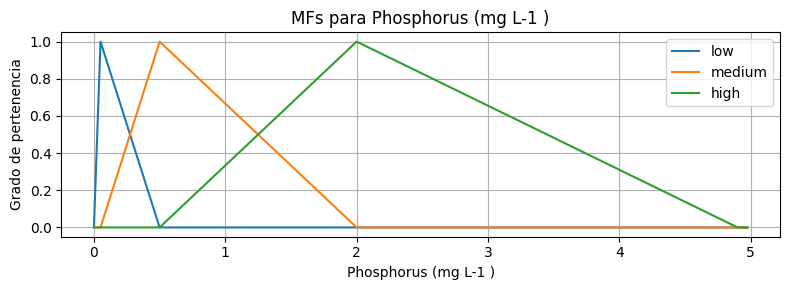

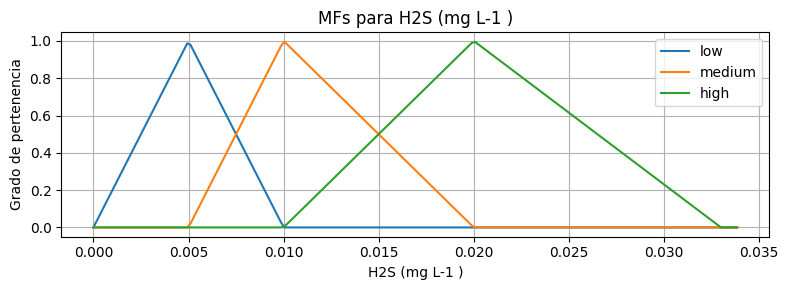

In [19]:
# 6) Visualizar todas las funciones de pertenencia
for col in feature_cols:
    x = universes[col]
    plt.figure(figsize=(8, 3))
    for label, mf in mfs[col].items():
        plt.plot(x, mf, label=label)
    plt.title(f'MFs para {col}')
    plt.xlabel(col)
    plt.ylabel('Grado de pertenencia')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()